In [2]:
import numpy as np
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

In [4]:
np.random.seed(0)

In [5]:
N = 100
mu = 0.2
sigma = 1
x = np.random.randn(N)*sigma + mu

In [13]:
N2 = 100
mu2 = 0.5
sigma2 = 1
x2 = np.random.randn(N)*sigma + mu

In [6]:
ztest(x)

(2.5648404153513686, 0.01032232684881584)

In [10]:
mu_hat = x.mean()
mu0 = 0
sigma_hat = x.std(ddof = 1)
z = (mu_hat - mu0) / (sigma_hat / np.sqrt(N))
p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf(-np.abs(z))
p_value = p_right + p_left
print(z,p_value)

2.564840415351368 0.010322326848815901


In [11]:
ztest(x, alternative = 'larger')

(2.5648404153513686, 0.00516116342440792)

In [12]:
mu0 = 0.2
ztest(x, value = mu0 )

(0.5904283402851699, 0.5549035151647227)

In [15]:
ztest(x,x2)

(-0.15295815048595537, 0.8784312779295879)

In [18]:
mu2_hat = x2.mean()
mu_hat = x.mean()
diff_mu_hat = mu2_hat - mu_hat

#ddof ? 

sigma_hat = x.var(ddof = 1)
sigma2_hat = x2.var(ddof = 1)

diff_sigma_hat = np.sqrt(sigma_hat / N + sigma2_hat / N)

z = diff_mu_hat / diff_sigma_hat

p_right = 1 - norm.cdf(np.abs(z))
p_left = norm.cdf( -np.abs(z))
p = p_right + p_left

print(f'P ve Z değeri : {z} {p}')

P ve Z değeri : 0.15295815048595537 0.8784312779295878


**Titanic Datasets**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
!wget https://lazyprogrammer.me/course_files/titanic_train.csv

--2022-07-21 14:18:07--  https://lazyprogrammer.me/course_files/titanic_train.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/csv]
Saving to: ‘titanic_train.csv’

titanic_train.csv   100%[===================>]  59.76K  --.-KB/s    in 0s      

2022-07-21 14:18:08 (130 MB/s) - ‘titanic_train.csv’ saved [61194/61194]



In [23]:
df = pd.read_csv('titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df[df['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C




*   H0 = Average fare of survived and not-survived groups are the same (µ1 = µ2)
*   H1 = Average fare of survived and not-survived groups are not the same (µ1 =/= µ2)


In [31]:
x1 = df[df['Survived'] == 1]['Fare'].dropna().to_numpy()
x2 = df[df['Survived'] == 0]['Fare'].dropna().to_numpy()

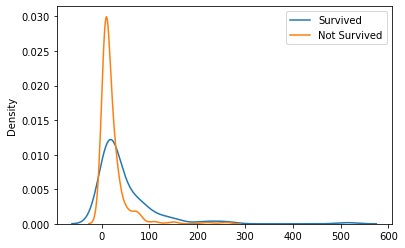

In [32]:
sns.kdeplot(x1, label = 'Survived')
sns.kdeplot(x2, label = 'Not Survived')
plt.legend();

In [33]:
x1.mean(), x2.mean()

(48.39540760233918, 22.117886885245902)

In [34]:
ztest(x1,x2)

(7.939191660871055, 2.035031103573989e-15)

Rejected the hypothesis that average fare of survived and not-survived groups are the same

*   H0 = Average age of survived male is the same with average age of survived woman (µ1 = µ2)
*   H1 = Average age of survived male is not the same with average age of survived woman (µ1 =/= µ2)


In [46]:
set1 = df[df['Sex'] == 'male'][df['Survived'] == 1]['Age'].dropna().to_numpy()
set2 = df[df['Sex'] == 'female'][df['Survived'] == 1]['Age'].dropna().to_numpy()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


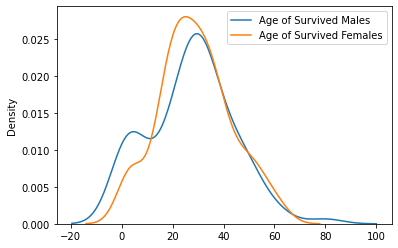

In [49]:
sns.kdeplot(set1, label = 'Age of Survived Males')
sns.kdeplot(set2, label = 'Age of Survived Females')
plt.legend();

In [50]:
set1.mean(), set2.mean()

(27.276021505376345, 28.84771573604061)

In [51]:
ztest(set1, set2)

(-0.8351170125126802, 0.40365182882615236)

Failed to reject Hypothesis 0 (Average age of survived male is the same with average age of survived woman)